## Problem Information

**Dataset:** Students' Dropout and Academic Success

**Source:** [UCI Machine Learning Repository] (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

**Task:** Supervised Learning Problem - Classification


This dataset contains student records with features related to their demographics, academic performance, and enrollment. 

**Target Variable:** Indicates whether a student successfully graduated, dropped out, or is still enrolled. 

**Aim:** To predict student outcomes based on these features.

## Importing Libraries

In [39]:
import pandas as pd # Data Manipulation and Analysis 
import seaborn as sns # Statistical visualisations/ graphics
from sklearn.preprocessing import LabelEncoder # Mapping categorical values to unique integers
from sklearn.model_selection import train_test_split # Dataset splitting

## Data Preparation

### Dataset Import and Overview

In [40]:
# Read CSV dataset into a DataFrame
df = pd.read_csv("data/data.csv", delimiter=";")
# Check first 10 rows
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


### Data Preprocessing

In [41]:
# Rename columns for clarity
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age', 'Daytime/evening attendance\t':'Daytime/Evening'}, inplace = True)

In [42]:
# Check if any null values present in the dataset
df.isnull().any().any()

np.False_

In [43]:
# Check column datatypes
df.dtypes.reset_index().rename(columns={"index":"Column", 0:"Datatype"}) 

,Column,Datatype
0,Marital status,int64
1,Application mode,int64
2,Application order,int64
3,Course,int64
4,Daytime/Evening,int64
5,Previous qualification,int64
6,Previous qualification (grade),float64
7,Nationality,int64
8,Mother's qualification,int64
9,Father's qualification,int64


In [44]:
# Identify categorical (non-continous) columns
list(set(df.columns) - set(df.describe().columns))

['Target']

In [45]:
# Check classes in target variable 
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
# Map categorical target variable to unique numerical variable with label encoding 
le = LabelEncoder() # Instantiate object
# Create copy to keep raw data for validation and reproducibility 
df_preprocessed = df.copy(deep=True)
# Apply encoding
df_preprocessed['Target'] = le.fit_transform(df_preprocessed['Target'])

In [55]:
# Validate encoding
assert df_preprocessed.shape[0] == df.shape[0] # Check shape remains equal
df_preprocessed['Target'].unique() # Check encoding has applied

array([0, 2, 1])

## Feature Engineering

In [86]:
# Number of unique non-binary categories - columns that may require aggregation 
df.nunique()[(df.nunique() > 2) # Filter > 2 
                               & (~df.nunique().index.str.contains("grade|units|rate|GDP", case=False)) # Exclude numerical variables i.e. 'grade' 
                               & (~df.nunique().index.isin(["Age", "Application order", "Target"]))]

Marital status             6
Application mode          18
Course                    17
Previous qualification    17
Nationality               21
Mother's qualification    29
Father's qualification    34
Mother's occupation       32
Father's occupation       46
dtype: int64

In [ ]:
# Feature mappings (for aggregation purposes)

# Marital Status
marital_mapping = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Common-law marriage",
    6: "Legally separated"
}

# Application Mode
admission_mapping = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}

# Previous/ Mother's/ Father's Qualification
prev_qual_mapping = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Parent's occupation 

In [77]:
# Aggregate categories
df

,Marital status,Application mode,Application order,Course,Daytime/Evening,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploratory Data Analysis (EDA)

In [56]:
# Descriptive Statistics - Include categorical columns
df_eda = df_preprocessed.copy(deep=True)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/Evening,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nationality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Father's qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


Count of Graduates: 2209
Count of Enrolled: 794
Count of Dropout: 1421


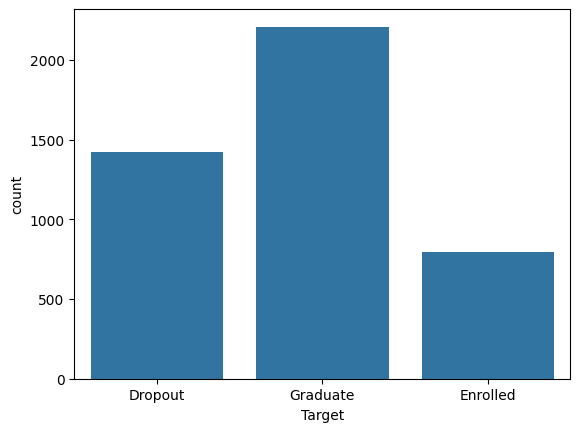

In [49]:
# Barplot of target veriable class count
sns.countplot(data=df, x='Target')

# Target Class Counts Displayed
grad_count = df['Target'].value_counts().get('Graduate', 0)
enrol_count = df['Target'].value_counts().get('Enrolled', 0)
dropout_count = df['Target'].value_counts().get('Dropout', 0)
print(f'''Count of Graduates: {grad_count}
Count of Enrolled: {enrol_count}
Count of Dropout: {dropout_count}''')

In [50]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

## Model Training

### Data Splitting

In [51]:
# Dataset Splitting 
X = df.drop(columns=['Target']) # All features excluding target (y)
y = df['Target'] # Target/predictive feature
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80% train, 20% test
    stratify=y,      
    random_state=42 # Reproducible seed
)